<a href="https://colab.research.google.com/github/Abhinav-2004/Machine-Learning-Notes/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [52]:
dataset=pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values


In [45]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [53]:
print(y)
#converting to 2D array for feature scaling to work

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [54]:
y1=y.reshape(len(y), 1)
print(y1)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

because the difference in scale is very big between X and y

In [55]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=sc_X.fit_transform(X)
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [57]:
sc_y=StandardScaler()
y1=sc_y.fit_transform(y1)
print(y1)


[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [61]:
from sklearn.svm import SVR
regressor=SVR(kernel = 'rbf') #here we input parameter unlike others
regressor.fit(X, y1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [65]:
X_test=sc_X.transform([[6.5]]) #feature scaling custom input
y_pred=(regressor.predict(X_test).reshape(-1,1))
#inverse transform to decode the feature scaling
y_pred=sc_y.inverse_transform(y_pred)
print(y_pred)

[[170370.0204065]]


## Visualising the SVR results

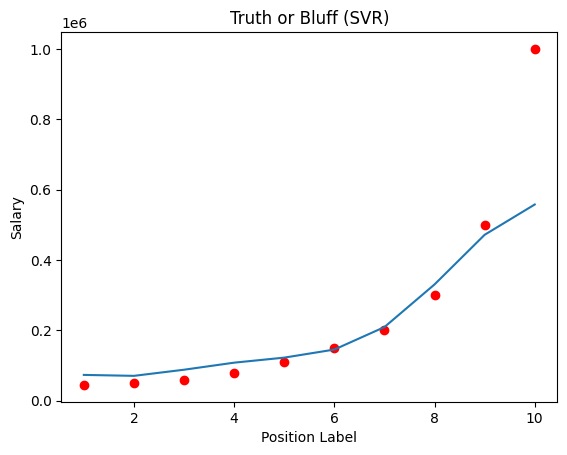

In [73]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y1), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)))
plt.title("Truth or Bluff (SVR)")
plt.xlabel("Position Label")
plt.ylabel("Salary")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

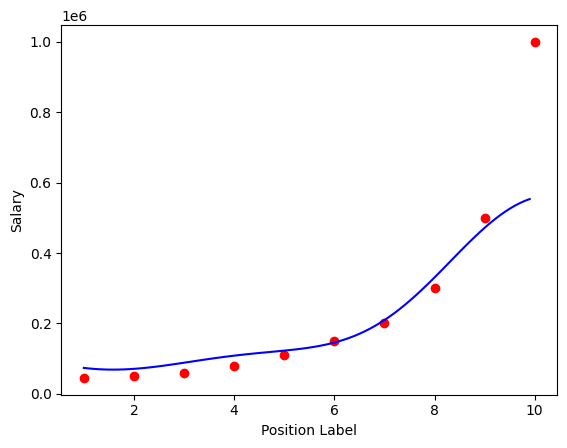

In [78]:
X_grid=np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid=X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y1), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color='blue')
plt.xlabel("Position Label")
plt.ylabel("Salary")
plt.show()